In [1]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

In [2]:
@njit
def calculate_energy(lattice, J, h, N):
    energy = 0.0
    for i in range(N):
        for j in range(N):
            spin = lattice[i, j]
            neighbors = (
                lattice[(i+1)%N, j] +
                lattice[(i-1)%N, j] +
                lattice[i, (j+1)%N] +
                lattice[i, (j-1)%N]
            )
            energy += -J * spin * neighbors
            energy += -h * spin
    return energy / 2.0  # avoid double counting

@njit
def metropolis_sweep(lat, J, h, T, N):
    for _ in range(N*N):
        i = np.random.randint(0, N)
        j = np.random.randint(0, N)

        spin = lat[i, j]
        neighbors = (
            lat[(i+1)%N, j] +
            lat[(i-1)%N, j] +
            lat[i, (j+1)%N] +
            lat[i, (j-1)%N]
        )

        delta_E = 2 * spin * (J * neighbors + h)

        if delta_E <= 0 or np.random.rand() < np.exp(-delta_E / T):
            lat[i, j] *= -1

@njit
def run_simulation(lat, sweeps, J, h, T, N):
    magnet = np.zeros(sweeps)
    energies = np.zeros(sweeps)

    for sweep in range(sweeps):
        metropolis_sweep(lat, J, h, T, N)
        energies[sweep] = calculate_energy(lat, J, h, N)
        magnet[sweep] = np.mean(lat)

    return energies, magnet

T=0.10  E=-19970.09  M=-0.99
T=0.25  E=-19576.53  M=-0.09
T=0.41  E=-19978.88  M=0.99
T=0.56  E=-19992.80  M=-1.00
T=0.71  E=-19549.66  M=-0.22
T=0.86  E=-19917.49  M=-0.96
T=1.02  E=-19884.61  M=0.95
T=1.17  E=-19906.19  M=-1.00
T=1.32  E=-18890.64  M=0.01
T=1.47  E=-19313.62  M=-0.83
T=1.63  E=-18510.40  M=0.14
T=1.78  E=-18468.08  M=0.86
T=1.93  E=-17473.36  M=-0.68
T=2.08  E=-16024.72  M=0.20
T=2.24  E=-14914.53  M=-0.74
T=2.39  E=-12072.46  M=0.01
T=2.54  E=-10745.71  M=-0.04
T=2.69  E=-9628.47  M=-0.00
T=2.85  E=-8860.40  M=-0.02
T=3.00  E=-8172.76  M=0.00


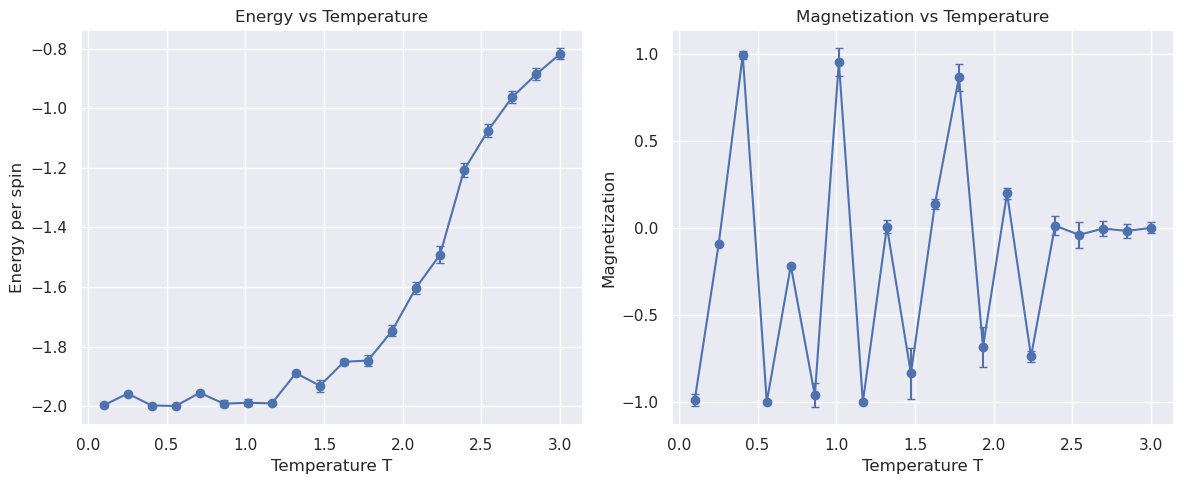

In [6]:
N = 100     # lattice size
h = 0        # external field
J = 1        # Interaction strength (ferromagnetic)
T = 2.5      # Temperature
energy = 0.0 # Energy
sweeps = 1000

def initialize_lattice(N):
    return np.random.choice([-1, 1], size=(N, N))

def simulate_ising(N, T, h, sweeps=1000):
    J = 1.0
    lat = initialize_lattice(N)

    # Thermalization
    for _ in range(sweeps):
        metropolis_sweep(lat, J, h, T, N)

    # Measurement
    energies, magnet = run_simulation(lat, sweeps, J, h, T, N)

    return np.mean(energies), np.std(energies), \
           np.mean(magnet), np.std(magnet), lat

def temperature_sweep(N, h, T_values, sweeps=1000):
    avg_E, std_E, avg_M, std_M = [], [], [], []

    for T in T_values:
        E_mean, E_std, M_mean, M_std, _ = simulate_ising(N, T, h, sweeps)
        avg_E.append(E_mean / (N * N))
        std_E.append(E_std / (N * N))
        avg_M.append(M_mean)
        std_M.append(M_std)
        print(f"T={T:.2f}  E={E_mean:.2f}  M={M_mean:.2f}")

    return np.array(avg_E), np.array(std_E), np.array(avg_M), np.array(std_M)

# Run the sweep
Ts = np.linspace(0.1, 3.0, 20)
E, E_err, M, M_err = temperature_sweep(N=N, h=0, T_values=Ts, sweeps=1000)

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.errorbar(Ts, E, yerr=E_err, fmt='o-', capsize=3)
plt.xlabel("Temperature T")
plt.ylabel("Energy per spin")
plt.title("Energy vs Temperature")

plt.subplot(1, 2, 2)
plt.errorbar(Ts, M, yerr=M_err, fmt='o-', capsize=3)
plt.xlabel("Temperature T")
plt.ylabel("Magnetization")
plt.title("Magnetization vs Temperature")

plt.tight_layout()
plt.show()

T=0.10  E=-19961.31  M=0.98
T=0.25  E=-19576.04  M=-0.20
T=0.41  E=-19584.29  M=-0.13
T=0.56  E=-19999.99  M=-1.00
T=0.71  E=-19729.62  M=-0.77
T=0.86  E=-19988.52  M=-1.00
T=1.02  E=-19840.97  M=0.92
T=1.17  E=-19768.65  M=-0.92
T=1.32  E=-19478.49  M=0.79
T=1.47  E=-19243.61  M=0.79
T=1.63  E=-18717.94  M=-0.67
T=1.78  E=-18667.67  M=-0.96
T=1.93  E=-16922.54  M=-0.07
T=2.08  E=-15995.41  M=-0.30
T=2.24  E=-14439.23  M=0.40
T=2.39  E=-12207.96  M=-0.15
T=2.54  E=-10705.97  M=0.01
T=2.69  E=-9705.72  M=0.00
T=2.85  E=-8861.25  M=-0.01
T=3.00  E=-8159.94  M=-0.01
T=0.10  E=-22500.00  M=1.00
T=0.25  E=-22500.00  M=1.00
T=0.41  E=-22500.00  M=1.00
T=0.56  E=-22500.00  M=1.00
T=0.71  E=-22499.84  M=1.00
T=0.86  E=-22497.47  M=1.00
T=1.02  E=-22487.54  M=1.00
T=1.17  E=-22459.91  M=1.00
T=1.32  E=-22400.25  M=1.00
T=1.47  E=-22290.17  M=0.99
T=1.63  E=-22108.87  M=0.99
T=1.78  E=-21848.99  M=0.98
T=1.93  E=-21492.61  M=0.97
T=2.08  E=-21023.20  M=0.96
T=2.24  E=-20417.04  M=0.94
T=2.39  E=

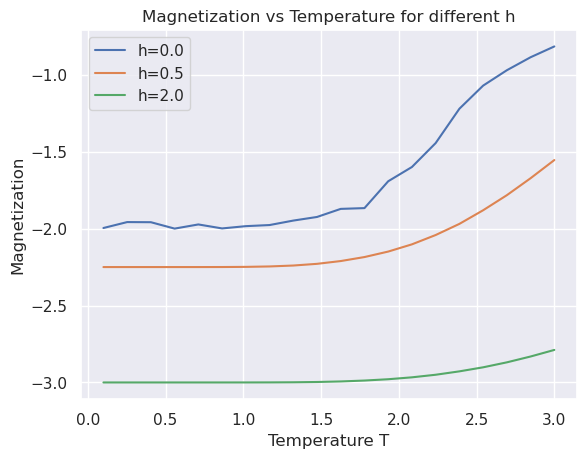

In [8]:
for h_val in [0.0, 0.5, 2.0]:
    M, _, _, _ = temperature_sweep(N=N, h=h_val, T_values=Ts, sweeps=1000)
    plt.plot(Ts, M, label=f"h={h_val}")

plt.xlabel("Temperature T")
plt.ylabel("Magnetization")
plt.title("Magnetization vs Temperature for different h")
plt.legend()
plt.show()